In [1]:
from pylab import * ## Basic stuff
import cmath ## Math function
import matplotlib.pyplot as plt ## Plotting stuff
import numpy as np ## Basic numerical packages
from scipy.special import gamma, factorial ## For the gamma function
from scipy.optimize import curve_fit
from scipy.integrate import *

In [2]:
alpha = 1./137.036 ## fine structure constant
me = 9.1e-31 ## in kg ## electron mass in SI
c = 3e8 ## in m/s ## speed of light in SI
pi = 3.14159 ## pi
MeV = 1.6e-19*1e6 ## for conversion from SI to MeV
m = me * c * c / MeV ## electron mass in MeV
M = m*1000 ## electron mass in keV

In [3]:
def FermiFunc(Z,A,sign,W):
    p = sqrt(W*W-1) ## momentum in electron mass unit
    
    ## For rho: Elton's formula
    rho = 0.0029*pow(A,1./3.)+0.0063*pow(A,-1./3.)-0.0017/A
    
    S = sqrt(1-alpha*alpha*Z*Z)
    eta = sign*alpha*Z*W/p
    prefactor = 2.*(1.+S)/(gamma(1.+2.*S)*gamma(1.+2.*S))
    mod_sq_gamma = abs(gamma(S+complex(0,1)*eta)*gamma(S+complex(0,1)*eta))
    F = prefactor * pow((2.*rho*p),(2*(S-1))) * exp(pi*eta) * mod_sq_gamma
    
    return F

def lin(x, a, b):
    return a*x + b

def illeszt(f, x, y):
    popt,pcov=curve_fit(f, x, y) # az illesztés elvégzése
    perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
    print(popt, '+-', perr)
    return popt, perr

In [4]:
with open('titkosCs137_7200s.mca') as f:
    N_Cs = []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='#': # file-ban lévő komment kiszedése
            N_Cs.append( int(sor.split()[0]) )

In [5]:
with open('Sr90_300ks.mca') as f:
    N_Sr = []
    for sor in f: # így iterálhatunk végig egy adatfolyamon vagy file-on
        if sor[0]!='#': # file-ban lévő komment kiszedése
            N_Sr.append( int(sor.split()[0]) )

In [6]:
x = []
for i in range(len(N_Cs)):
    x.append(i+1)

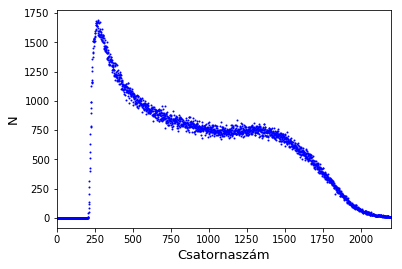

In [26]:
plot(x, N_Cs, 'b.', markersize = 2)
xlim(0, 2200)
xlabel('Csatornaszám', fontsize = 13)
ylabel('N', fontsize = 13)
savefig('Cs_csat.png')

In [43]:
def linfit(N, Z, A, sign, index, E):
    ntr = []
    e = []
    for i in range(len(index)): #Fermi-Kurie trafó az ereszkedő részre
        ntr.append(sqrt(N[index[i]]/(FermiFunc(Z, A, sign, 1+E[index[i]]/M)*sqrt(pow(M+E[index[i]], 2) - pow(M, 2))*(M+E[index[i]]))))
        e.append(E[index[i]] + M)
    par, hiba = illeszt(lin, e, ntr)
    Emax = -1*par[1]/par[0] - M  #sqrt(K')-vel leosztok az Emax-hoz
    Emaxerr = abs(1/par[0])*hiba[1] + abs(par[1]/pow(par[0],2))*hiba[0] #hibaterjedés
    print('Emax =', Emax, '+-', Emaxerr, 'keV')
    
    return par, hiba, Emax

In [9]:
def kalib(x2, ind):
    x1 = next(i for i, v in enumerate(N_Cs) if v != 0) + 1 # első nem nulla elem (sorszám a listában + 1)
    
    a = 629/(x2-x1) #egyenes illesztés, egyenletrendszerrel
    b = 1 - a*x1
    print('a =', a)
    print('b =', b)
    
    E = []
    
    for i in range(len(x)):
        E.append(a*x[i] + b)
    
    c, er, Em_Cs = linfit(N_Cs, 55, 137, 1, ind, E)
    
    return E, c, er, Em_Cs

In [44]:
En, egy_Cs, egyerr_Cs, Emax_Cs = kalib(1410, [350, 500, 600])

a = 0.5224252491694352
b = -106.61960132890366
[-5.67648833e-05  5.76469808e-02] +- [6.25794415e-06 4.13317145e-03]
Emax = 503.6644922374048 +- 184.76847399002855 keV


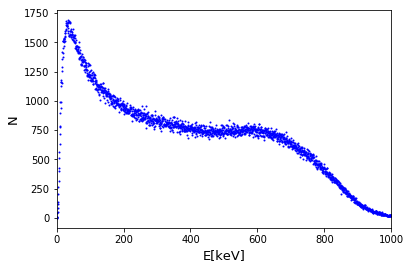

In [11]:
plot(En, N_Cs, 'b.', markersize = 2)
xlim(0, 1000)
xlabel('E[keV]', fontsize = 13)
ylabel('N', fontsize = 13)
savefig('Cs_en.png')

/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 1000)

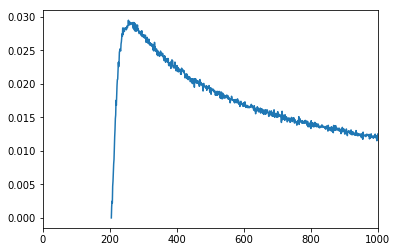

In [32]:
N_tr = [] #proba, hogy néz ki a transzformált fv
for i in range(len(N_Cs)):
    N_tr.append(sqrt(N_Cs[i]/(FermiFunc(55, 137, 1, 1+En[i]/M)*sqrt(pow(M+En[i], 2) - pow(M, 2))*(M+En[i]))))
    
plot(x, N_tr)
xlim(0, 1000)

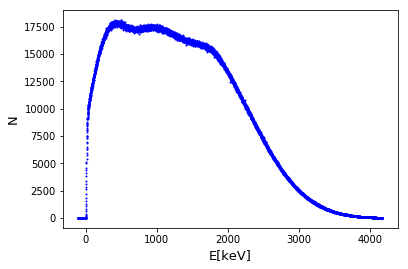

In [13]:
plot(En, N_Sr, 'b.', markersize = 2)
xlabel('E[keV]', fontsize = 13)
ylabel('N', fontsize = 13)
savefig('Sr_en.png')

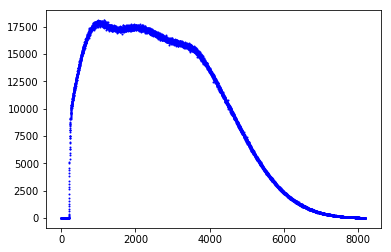

In [14]:
plot(x, N_Sr, 'b.', markersize = 2)
#xlim(4000)
#ylim(15000,)

/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
/home/friss/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(0, 2000)

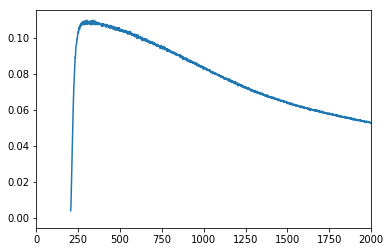

In [34]:
N_tr_Sr = [] #proba hogy néz ki a transzformált fv
for i in range(len(N_Cs)):
    N_tr_Sr.append(sqrt(N_Sr[i]/(FermiFunc(38, 90, 1, 1+En[i]/M)*sqrt(pow(M+En[i], 2) - pow(M, 2))*(M+En[i]))))
    
plot(x, N_tr_Sr)
xlim(0, 2000)

In [45]:
egy_Sr_h, egyerr_Sr_h, Emax_Sr_h = linfit(N_Sr, 39, 90, 1, [4200, 4900, 5400], En)

[-1.98518627e-05  7.63381449e-02] +- [7.82579888e-07 2.30242030e-03]
Emax = 3333.514531574166 +- 267.5690889683426 keV


In [40]:
N_Sr_h = list(np.zeros(206)) #visszatrafó és levonás
for i in range(len(En)-206):
    N_Sr_h.append(lin(En[i+206], *egy_Sr_h)**2*FermiFunc(39, 90, 1, 1+En[i+206]/M)*sqrt((M+En[i+206])**2-M**2)*(M+En[i+206]))
    
N_Sr_l = list(array(N_Sr) - array(N_Sr_h))

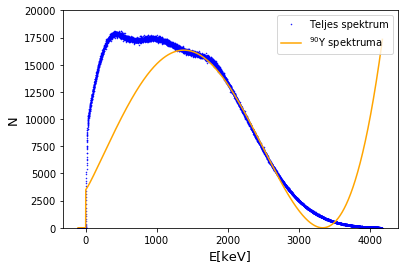

In [41]:
plot(En, N_Sr, 'b.', markersize = 1, label = 'Teljes spektrum')
plot(En, N_Sr_h, color = 'orange', label = r'$^{90}$Y spektruma')
ylim(0, 20000)
xlabel('E[keV]', fontsize = 13)
ylabel('N', fontsize = 13)
legend(loc = 1)
savefig('Sr_high.png')

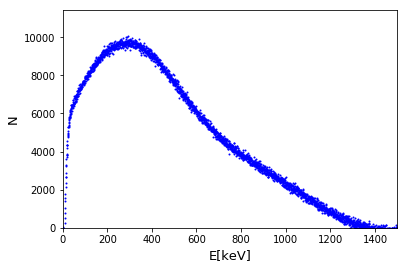

In [42]:
plot(En, N_Sr_l, 'b.', markersize = 2)
ylim(0,)
xlim(0, 1500)
xlabel('E[keV]',fontsize = 13)
ylabel('N', fontsize = 13)
savefig('Sr_low.png')

In [19]:
egy_Sr_l, egyerr_Sr_l, Emax_Sr = linfit(N_Sr_l, 38, 90, 1, [1200, 1300, 1400], En)

[-9.19529007e-05  9.59649882e-02] +- [1.54862225e-06 8.89901863e-04]
Emax = 1043.6319840957383 +- 27.254100294557524 keV


Alábbiak mint kiderült nem kellenek, de nem akartam kitörölni.

In [20]:
#Sn = 1
def F_Sr(en):
    return FermiFunc(38, 90, 1, 1+en/M)*pow((Emax_Sr-en), 2)*sqrt(pow((M+en),2)-pow(M,2))*(en+M)
    
def F_Cs(en):
    return FermiFunc(55, 137, 1, 1+en/M)*pow((Emax_Cs-en), 2)*sqrt(pow((M+en),2)-pow(M,2))*(en+M)

def f_int(Func, Emax, izo, t):
    f = array(quad(Func, 0, Emax)) / pow(M,5)
    print(izo, 'f = ', f)
    ft = f[0]*t
    print(izo, 'log10(ft) =', log10(ft))
    
    return ft

def g(ft, Mfi, izo):
    gg_si = sqrt(log(2)*2*pow(pi,3)*pow(hbar,7) / (ft*pow(me,5)*pow(c,4)*pow(Mfi,2))) # kg*m^5*s^-2=J*m^3
    gg = gg_si*1e45/MeV #Mev*fm^3
    #gg = gg_si*((1.602e-10)**2)/((hbar*c)**3)
    print(izo, 'g =', gg, 'MeV*fm^3')
    return gg

In [21]:
ft_Sr = f_int(F_Sr, Emax_Sr, 'Sr:', 28.79)

Sr: f =  [2.03179210e+01 2.90872237e-07]
Sr: log10(ft) = 2.7671209331203777


In [22]:
ft_Cs = f_int(F_Cs, Emax_Cs, 'Cs:', 30.08)

Cs: f =  [3.23095451e+00 2.66518426e-08]
Cs: log10(ft) = 1.9876086755801377


In [23]:
Mfi_Cs = 6.72e-7
Mfi_Sr = 1.47e-5
hbar = 1.055e-34

In [24]:
g_Cs = g(ft_Cs, Mfi_Cs, 'Cs:')
print('Cs:', ft_Cs*Mfi_Cs**2)

Cs: g = 1049.2911553136382 MeV*fm^3
Cs: 4.388814465435086e-11


In [25]:
g_Sr = g(ft_Sr, Mfi_Sr, 'Sr:')
print('Sr:', ft_Sr*Mfi_Sr**2)

Sr: g = 19.552028502067845 MeV*fm^3
Sr: 1.2640248226621356e-07
